In [ ]:
print('Please enter the weight and height: ')
print('1: kilograms/meters')
print('2: pounds/inches')
selection = input('Please Choose the option: ')

# BMI formula: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

try:
    if selection=='1':
        w = float(input('Weight in kilograms'))
        h = float(input('height in meters'))
        bmi = w/(h*h) 
    elif selection=='2':
        w = float(input('Weight in pounds'))
        h = float(input('height in inches'))
        bmi = 703*w/(h*h)
    if bmi<18.5:
        print('BMI:',round(bmi,2),'and You are Underweight')
    elif bmi>=18.5 and bmi<=24.9:
        print('BMI:',round(bmi,2),'and You are Normal')
    elif bmi>25 and bmi<29.9:
        print('BMI:',round(bmi,2),'and You are Overweight')
    else:
        print('BMI:',round(bmi,2),'and You are Obese')
    print()
    print('------------------------------------') 
    print('''BMI VALUES
    If less than 18.5 : Underweight
    If between 18.5 and 24.9 : Normal
    If between 25 and 29.9 : Overweight
    If 30 or greater : Obese''')
    print('------------------------------------')
except:
    print('Wrong selection.')

In [15]:
import yfinance as yf  
import pandas as pd
import numpy as np
# download data from yahoo finance
data = yf.download('GOOGL','2019-01-01','2021-10-01')
data = data.reset_index() # reset the index to make it 0,1,2..
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,1057.829956,1062.989990,1033.040039,1044.959961,1044.959961,1655500
1,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
2,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
4,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300


In [16]:
data.dtypes # check the datatypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [17]:
# EMA for 5 days computation: 
modPrice = data['Adj Close'].copy()
modPrice.iloc[0:4] = np.NaN
# ewm: exponential weighted function
ema5alt =modPrice.ewm(span=5, adjust=False).mean()
data['EMA5'] = np.round(ema5alt, decimals=2)

In [18]:
# EMA for 20 days
modPrice = data['Adj Close'].copy()
modPrice.iloc[0:19] = np.NaN
ema20alt =modPrice.ewm(span=20, adjust=False).mean()
data['EMA20'] = np.round(ema20alt, decimals=2)

In [19]:
data = data.dropna() # drop the NaN rows
data = data.reset_index() 

In [20]:
# add a signal column containg buy and sell signal
# if EMA 5 is above EMA 20 then Buy 
# if you are holding a stock and EMA 5 goes below EMA 20 then sell
data['signal'] = np.where(data['EMA5']>data['EMA20'], 'Buy', 'Sell')

In [21]:
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA20,signal
0,19,2019-01-29,1081.040039,1084.729980,1066.020020,1070.060059,1070.060059,985200,1081.59,1070.06,Buy
1,20,2019-01-30,1077.359985,1099.520020,1076.640015,1097.989990,1097.989990,1472600,1087.06,1072.72,Buy
2,21,2019-01-31,1112.239990,1127.670044,1105.250000,1125.890015,1125.890015,2011600,1100.00,1077.78,Buy
3,22,2019-02-01,1122.290039,1134.400024,1114.250000,1118.619995,1118.619995,1655800,1106.21,1081.67,Buy
4,23,2019-02-04,1119.010010,1142.339966,1117.510010,1141.420044,1141.420044,3920400,1117.95,1087.36,Buy


In [22]:
# if EMA 5 is continuously above EMA 20 then hold i.e value will be '-' in signal column
k=list(data['signal'])
for i in range(len(k)):
    if i==0:
        s=k[i]
    else:
        if k[i]==s:
            k[i]='-'
        else:
            s=k[i]
data['signal'] = k

In [23]:
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA20,signal
0,19,2019-01-29,1081.040039,1084.729980,1066.020020,1070.060059,1070.060059,985200,1081.59,1070.06,Buy
1,20,2019-01-30,1077.359985,1099.520020,1076.640015,1097.989990,1097.989990,1472600,1087.06,1072.72,-
2,21,2019-01-31,1112.239990,1127.670044,1105.250000,1125.890015,1125.890015,2011600,1100.00,1077.78,-
3,22,2019-02-01,1122.290039,1134.400024,1114.250000,1118.619995,1118.619995,1655800,1106.21,1081.67,-
4,23,2019-02-04,1119.010010,1142.339966,1117.510010,1141.420044,1141.420044,3920400,1117.95,1087.36,-


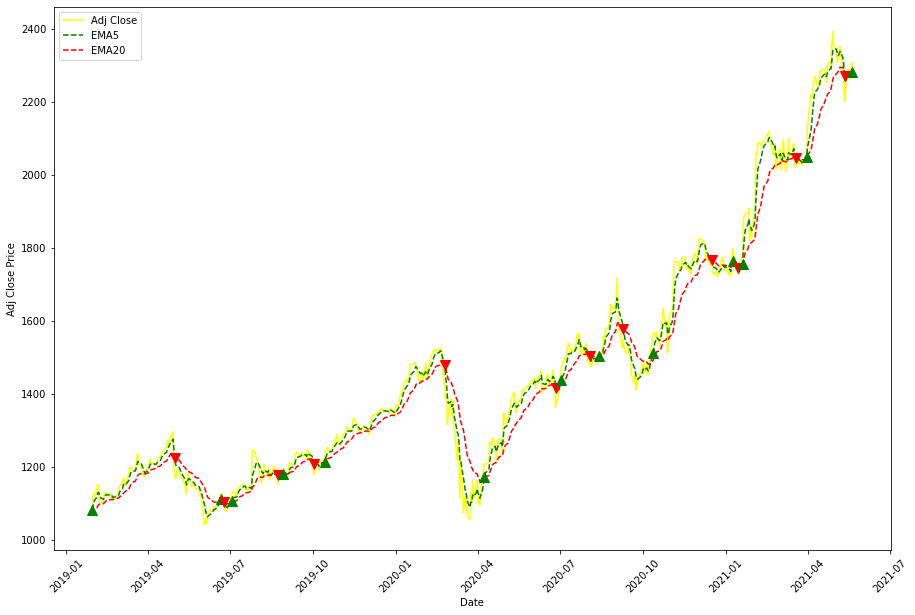

In [24]:
import matplotlib.pyplot as plt
# plot graph
plt.figure(figsize=(15,10))
plt.plot(data['Date'],data['Adj Close'],color='yellow',label='Adj Close')
plt.plot(data['Date'],data['EMA5'],color='g',linestyle='--',label='EMA5')
plt.plot(data['Date'],data['EMA20'],color='r',linestyle='--',label='EMA20')
plt.xticks(rotation = 45)
# plot green and red tick.
# green for buy and red for sell signal
for i in range(len(data)):
    if data['signal'][i]=='Buy':
        plt.plot(data['Date'][i],data['EMA5'][i], '^', markersize=10, color='g')
    elif data['signal'][i]=='Sell':
        plt.plot(data['Date'][i],data['EMA5'][i], 'v', markersize=10, color='r')
plt.ylabel('Adj Close Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()